## HR Analytics (Analysis Code - Best Basic Kenel)
----------------------
**1. Importing the necessary libraries**

In [1]:
# To prevent the annoying warning from scikit learn package
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')
cmap = sns.cm.mako_r

%matplotlib inline

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

**2. Importing the Data using Pandas read_csv(). And calling head() and info() on the DataFrame**

In [4]:
ls

Clone__HR_Analytics_for_beginners.ipynb
Clone__Predict_who_will_move_to_a_new_job.ipynb
HR_Analytics.ipynb
catboost_info/
data/
submission.csv


In [7]:
aug_train = pd.read_csv('./data/aug_train.csv')

In [8]:
aug_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
aug_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

-------------------------
**3. Calling isna() and checking the total number of Null Data**

In [10]:
aug_train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

------------
As we can see that there are a lot of missing values and most of them are Categorical and it is not feasible to fill those values as we may end up providing completly wrong data to the training set. So, I prefer dropping them instead.

In [11]:
aug_train.dropna(inplace=True)

In [13]:
aug_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8955 non-null   int64  
 1   city                    8955 non-null   object 
 2   city_development_index  8955 non-null   float64
 3   gender                  8955 non-null   object 
 4   relevent_experience     8955 non-null   object 
 5   enrolled_university     8955 non-null   object 
 6   education_level         8955 non-null   object 
 7   major_discipline        8955 non-null   object 
 8   experience              8955 non-null   object 
 9   company_size            8955 non-null   object 
 10  company_type            8955 non-null   object 
 11  last_new_job            8955 non-null   object 
 12  training_hours          8955 non-null   int64  
 13  target                  8955 non-null   float64
dtypes: float64(2), int64(2), object(10)
mem

-------------
**4. As most of the Data is Categorical we plot Bar/Pie to visualize the Categorical Data**

In [15]:
aug_train['gender'].value_counts()

Male      8073
Female     804
Other       78
Name: gender, dtype: int64

In [16]:
aug_train['gender'].value_counts().index

Index(['Male', 'Female', 'Other'], dtype='object')

In [17]:
aug_train['gender'].value_counts().values

array([8073,  804,   78])

In [20]:
# Function to Plot Bar Graph
def plot_bar_graph(column, order=None):
    x = aug_train[column].value_counts().index
    y = aug_train[column].value_counts().values
    sns.barplot(x, y, order=order)
    
# Function to Plot Pie Chart
def plot_pie_chart(column, title=''):
    values = aug_train[column].value_counts().values
    labels = aug_train[column].value_counts().index
    plt.figure(figsize=(6,6))
    plt.title(title)
    plt.pie(x=values, labels=labels, autopct='%1.2f%%', textprops={'color':'w'})

1. Pie Chart for Gender

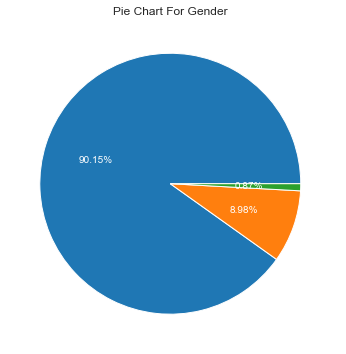

In [21]:
plot_pie_chart('gender', title='Pie Chart For Gender')
plt.show()

As we can see that most of the Candidates working are Male

__________
1. Pie Chart for Relevent Experience

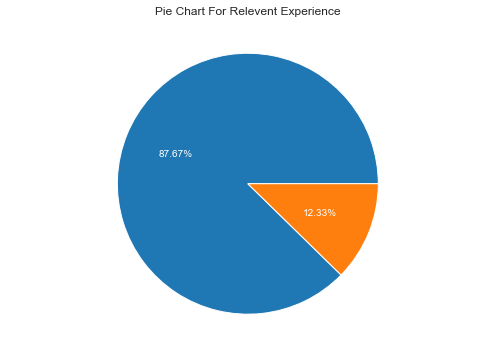

In [22]:
plot_pie_chart('relevent_experience', title='Pie Chart For Relevent Experience')
plt.show()

-----------------
1. Enrolled University

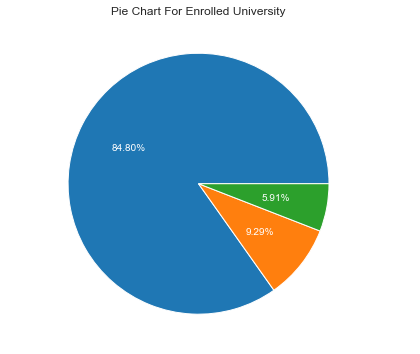

In [23]:
plot_pie_chart('enrolled_university', title='Pie Chart For Enrolled University')
plt.show()

_________
2. Education Level

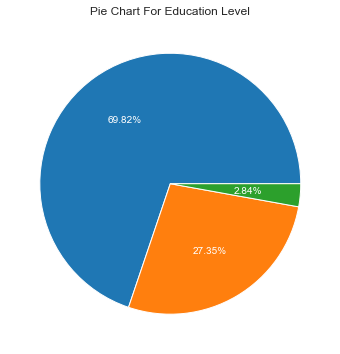

In [24]:
plot_pie_chart('education_level', title='Pie Chart For Education Level')
plt.show()

___________
1. Major Discipline

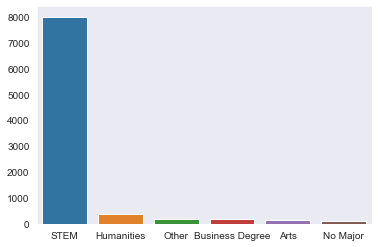

In [25]:
plot_bar_graph('major_discipline')
plt.show()

Most of the Candidates are from STEM. That is their major discipline was in one of the Following:

1. Science
2. Technology
3. Engineering
4. Mathematics


____________
1. Company Size

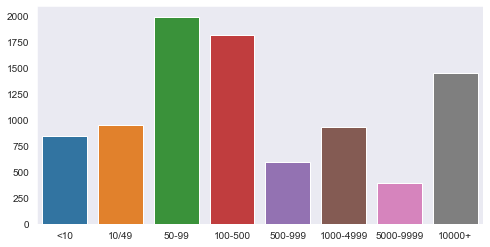

In [26]:
plt.figure(figsize=(8,4))
order = ['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
plot_bar_graph('company_size',order=order)
plt.show()

-------------
1. Company Type

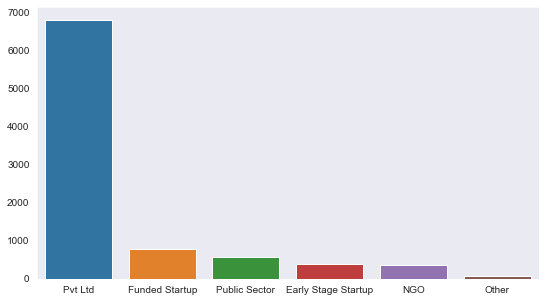

In [27]:
plt.figure(figsize=(9,5))
plot_bar_graph('company_type')
plt.show()

-----------
1. How many Jobs Candidates Worked before joining the current company

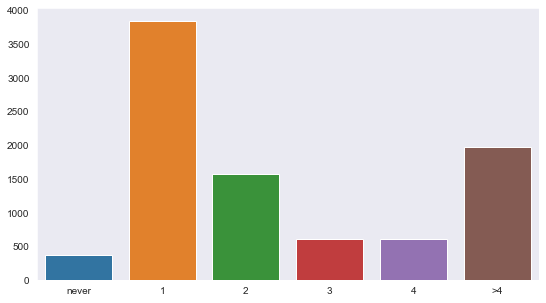

In [28]:
plt.figure(figsize=(9,5))
order = ['never', '1', '2', '3', '4', '>4']
plot_bar_graph('last_new_job', order=order)
plt.show()

-----------
1. Let's play a Histogram to see the Distribution of the Training Hours

<AxesSubplot:xlabel='training_hours'>

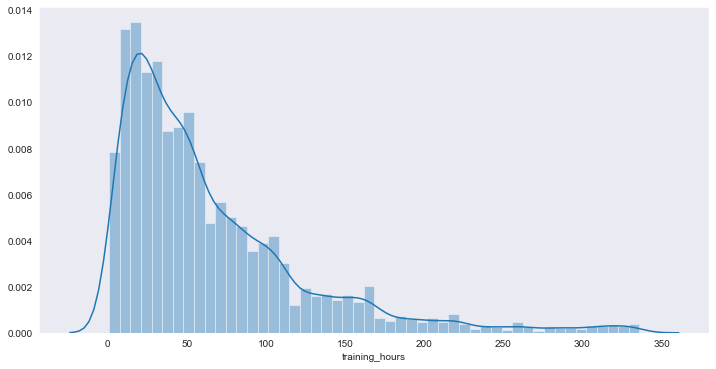

In [30]:
plt.figure(figsize=(12,6))
sns.distplot(aug_train['training_hours'], kde=True)

The Graph reveals the most of the Candidates train for 20 to 50 Hours

---------
Before moving on to the prediction part we will check relation between few features and Training Hours, as peaple looking for a Job Change tend to Train for longer hours.

1. Relevent Experience vs Training Hours
2. Education Level vs Training Hours
3. Major Discipline vs Training Hours
4. Company Size vs Training Hours
5. Company Type vs Training Hours
6. Last New Job vs Training Hours

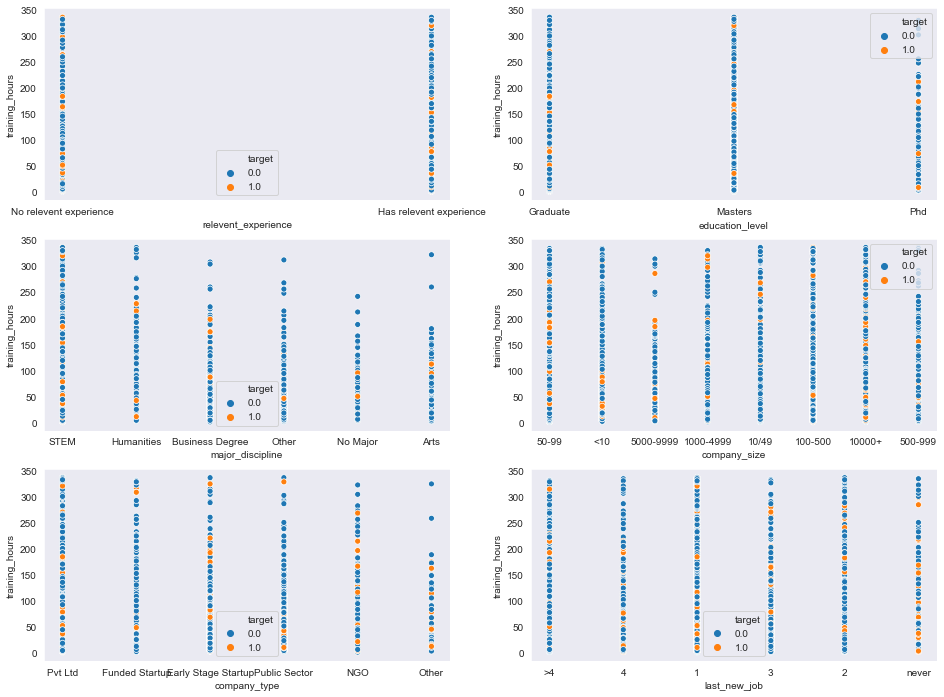

In [34]:
fig, axes = plt.subplots(3,2, figsize=(16,12))

sns.scatterplot('relevent_experience', 'training_hours', data=aug_train, hue='target', ax=axes[0,0])
sns.scatterplot('education_level', 'training_hours', data=aug_train, hue='target', ax=axes[0,1])
sns.scatterplot('major_discipline', 'training_hours', data=aug_train, hue='target', ax=axes[1,0])
sns.scatterplot('company_size', 'training_hours', data=aug_train, hue='target', ax=axes[1,1])
sns.scatterplot('company_type', 'training_hours', data=aug_train, hue='target', ax=axes[2,0])
sns.scatterplot('last_new_job', 'training_hours', data=aug_train, hue='target', ax=axes[2,1])

plt.show()

--------------
**5. Let's get to the prediction part**

1. Data preprocessing Phase
* Using pandas get_dummies() to convert the Categorical Data to Numerical Features
* Then Removing the Unnecessary Columns

In [35]:
aug_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [36]:
pd.get_dummies(aug_train['city'])

,city_1,city_10,city_100,city_101,city_102,city_103,city_104,city_105,city_106,city_107,...,city_84,city_89,city_9,city_90,city_91,city_93,city_94,city_97,city_98,city_99
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19149,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19152,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
list_of_columns = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level',
                   'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
aug_train_dummies_df = []

for col in list_of_columns:
    dummy_train_df = pd.get_dummies(aug_train[col])
    aug_train_dummies_df.append(dummy_train_df)
    

In [41]:
list_of_columns.append('enrollee_id')

In [42]:
aug_train.drop(columns=list_of_columns)

,city_development_index,training_hours,target
1,0.776,47,0.0
4,0.767,8,0.0
7,0.762,18,1.0
8,0.920,46,1.0
11,0.920,108,0.0
...,...,...,...
19147,0.624,52,1.0
19149,0.920,36,1.0
19150,0.920,23,0.0
19152,0.920,25,0.0


In [46]:
aug_train_dummies_df

[       city_1  city_10  city_100  city_101  city_102  city_103  city_104  \
 1           0        0         0         0         0         0         0   
 4           0        0         0         0         0         0         0   
 7           0        0         0         0         0         0         0   
 8           0        0         0         0         0         1         0   
 11          0        0         0         0         0         1         0   
 ...       ...      ...       ...       ...       ...       ...       ...   
 19147       0        0         0         0         0         0         0   
 19149       0        0         0         0         0         1         0   
 19150       0        0         0         0         0         0         0   
 19152       0        0         0         0         0         1         0   
 19155       0        0         0         0         0         1         0   
 
        city_105  city_106  city_107  ...  city_84  city_89  city_9  city_

In [47]:
aug_train_dummies_df.insert(0, aug_train.drop(columns=list_of_columns))

In [48]:
aug_train_dummies_df

[       city_development_index  training_hours  target
 1                       0.776              47     0.0
 4                       0.767               8     0.0
 7                       0.762              18     1.0
 8                       0.920              46     1.0
 11                      0.920             108     0.0
 ...                       ...             ...     ...
 19147                   0.624              52     1.0
 19149                   0.920              36     1.0
 19150                   0.920              23     0.0
 19152                   0.920              25     0.0
 19155                   0.920              44     0.0
 
 [8955 rows x 3 columns],
        city_1  city_10  city_100  city_101  city_102  city_103  city_104  \
 1           0        0         0         0         0         0         0   
 4           0        0         0         0         0         0         0   
 7           0        0         0         0         0         0         0   
 8  

In [50]:
len(aug_train_dummies_df)

11

In [53]:
aug_train = pd.concat(aug_train_dummies_df, axis=1)

1. Split the Data in to Training(70%) and Tesing(30%) and train the model and Check it accuracy

In [61]:
aug_train.isna().sum().sum()

0

In [62]:
aug_train.dropna().drop(columns=['target']).values

array([[ 0.776, 47.   ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       [ 0.767,  8.   ,  0.   , ...,  1.   ,  0.   ,  0.   ],
       [ 0.762, 18.   ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [ 0.92 , 23.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.92 , 25.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.92 , 44.   ,  0.   , ...,  1.   ,  0.   ,  0.   ]])

In [63]:
X = aug_train.dropna().drop(columns=['target']).values
y = aug_train.dropna()['target'].values

In [64]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3, random_state=80)


In [65]:
pipeline = make_pipeline(StandardScaler(), SVC(kernel='sigmoid'))
pipeline.fit(X_train, y_train)
prediction= pipeline.predict(X_valid)

print(f'Accuracy of the Model is {accuracy_score(y_valid, prediction)}')

Accuracy of the Model is 0.8652772608857462


1. Using Seaborn HeatMap we will plot Confusion Matrix

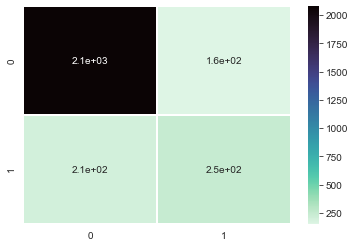

In [68]:
conf_matrix = confusion_matrix(y_valid, prediction)
sns.heatmap(conf_matrix, linewidths=1, cmap=cmap, annot=True)
plt.plot();